# Introdução ao Processamento Digital de Imagens
### Prof. Leonardo
### Módulo 1 do Trabalho Prático
### Data de entrega: 07/08/2019
Desenvolva um sistema para abrir, exibir, manipular e salvar imagens RGB com 24
bits/pixel (8 bits/componente/pixel). O sistema deve ter a seguinte funcionalidade:
1. Conversão RGB-YIQ-RGB (cuidado com os limites de R, G e B na volta!)
2. Exibição de bandas individuais (R, G e B) como imagens monocromáticas ou
coloridas (em tons de R, G ou B, respectivamente)
3. Negativo
4. Controle de brilho multiplicativo (s = r.c, c real não negativo) (cuidado com os limites de R, G e B)
5. Convolução m x n com máscara especificada pelo usuário em arquivo texto. Testar com filtros Média e Sobel.
6. Filtro mediana m x n.

O sistema deve ser desenvolvido em uma linguagem de programação de sua escolha. Não use bibliotecas ou funções especiais de processamento de imagens. Para os itens 3 e 4, duas formas de aplicação devem ser testadas: em RGB (banda a banda) e na banda Y, com posterior conversão para RGB.

Observações:
1. O trabalho pode ser feito em grupo, com até seis componentes.
2. Para integralização das notas, o trabalho deve ser apresentado na data e horário
marcados, juntamente com um relatório impresso, contendo pelo menos as
seguintes seções: introdução (contextualização e apresentação do tema,
fundamentação teórica, objetivos), materiais e métodos (descrição das atividades
desenvolvidas e das ferramentas e conhecimentos utilizados) resultados,
discussão (problemas e dificuldades encontradas, comentários críticos sobre os
resultados) e conclusão. Cada componente do grupo deve estar familiarizado
com o trabalho desenvolvido pelos demais componentes do seu grupo, e todos
devem comparecer à apresentação dos trabalhos.


In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%ls

2019_1_Trabalho1.pdf  Images/  README.md  Starting the project.ipynb


In [5]:
img = Image.open("Images/220px-Lenna_(test_image).png")

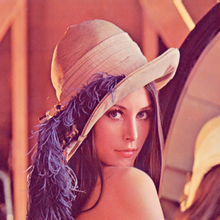

In [6]:
img

In [7]:
img_numpy = np.array(img)

In [8]:
img_numpy.shape

(220, 220, 3)

In [9]:
img_numpy[0][0]

array([225, 137, 127], dtype=uint8)

In [10]:
img_numpy

array([[[225, 137, 127],
        [224, 137, 127],
        [227, 134, 119],
        ...,
        [227, 141, 128],
        [232, 150, 124],
        [213, 120, 104]],

       [[225, 137, 127],
        [224, 136, 127],
        [227, 134, 119],
        ...,
        [230, 144, 130],
        [238, 155, 126],
        [219, 124, 105]],

       [[227, 137, 122],
        [224, 134, 118],
        [228, 133, 117],
        ...,
        [209, 113, 106],
        [189,  97,  96],
        [149,  61,  80]],

       ...,

       [[ 90,  28,  60],
        [ 95,  29,  61],
        [ 97,  28,  63],
        ...,
        [126,  42,  68],
        [148,  58,  73],
        [158,  59,  73]],

       [[ 87,  24,  61],
        [ 92,  27,  62],
        [ 95,  25,  61],
        ...,
        [143,  58,  78],
        [167,  67,  80],
        [169,  65,  78]],

       [[ 84,  22,  58],
        [ 95,  29,  62],
        [ 93,  24,  59],
        ...,
        [159,  67,  84],
        [176,  70,  81],
        [182,  71,  80]]

# Red?

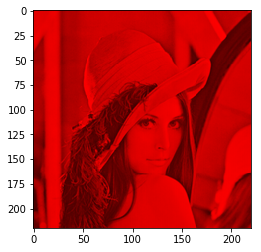

In [32]:
#plt.imshow(img_numpy[...,2], cmap="Blues")

rgbArray_r = np.zeros((220,220,3), 'uint8')
rgbArray_r[...,0] = img_numpy[...,0]

#img_b = Image.fromarray(img_numpy[..., 2])
img_b = Image.fromarray(rgbArray_r)
#img_b.show()
plt.imshow(rgbArray_r)

# Green?

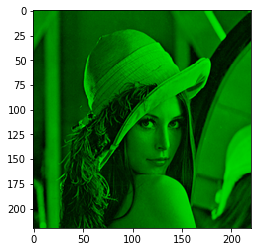

In [34]:
#plt.imshow(img_numpy[...,2], cmap="Blues")

rgbArray_g = np.zeros((220,220,3), 'uint8')
rgbArray_g[...,1] = img_numpy[...,1]

#img_b = Image.fromarray(img_numpy[..., 2])
img_g = Image.fromarray(rgbArray_g)
#img_b.show()
plt.imshow(rgbArray_g)

# Blue?

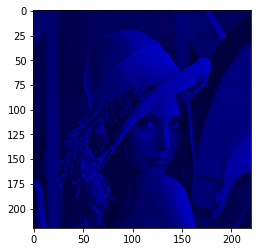

In [35]:
#plt.imshow(img_numpy[...,2], cmap="Blues")

rgbArray_b = np.zeros((220,220,3), 'uint8')
rgbArray_b[...,2] = img_numpy[...,2]

#img_b = Image.fromarray(img_numpy[..., 2])
img_b = Image.fromarray(rgbArray_b)
#img_b.show()
plt.imshow(rgbArray_b)

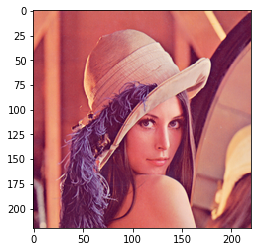

In [36]:
plt.imshow(rgbArray_r + rgbArray_g + rgbArray_b)

In [37]:
yArray = 0.299*rgbArray_r + 0.587*rgbArray_g + 0.114*rgbArray_b

In [39]:
yArray

array([[[67.275, 80.419, 14.478],
        [66.976, 80.419, 14.478],
        [67.873, 78.658, 13.566],
        ...,
        [67.873, 82.767, 14.592],
        [69.368, 88.05 , 14.136],
        [63.687, 70.44 , 11.856]],

       [[67.275, 80.419, 14.478],
        [66.976, 79.832, 14.478],
        [67.873, 78.658, 13.566],
        ...,
        [68.77 , 84.528, 14.82 ],
        [71.162, 90.985, 14.364],
        [65.481, 72.788, 11.97 ]],

       [[67.873, 80.419, 13.908],
        [66.976, 78.658, 13.452],
        [68.172, 78.071, 13.338],
        ...,
        [62.491, 66.331, 12.084],
        [56.511, 56.939, 10.944],
        [44.551, 35.807,  9.12 ]],

       ...,

       [[26.91 , 16.436,  6.84 ],
        [28.405, 17.023,  6.954],
        [29.003, 16.436,  7.182],
        ...,
        [37.674, 24.654,  7.752],
        [44.252, 34.046,  8.322],
        [47.242, 34.633,  8.322]],

       [[26.013, 14.088,  6.954],
        [27.508, 15.849,  7.068],
        [28.405, 14.675,  6.954],
        .

In [40]:
iArray = 0.5959*rgbArray_r - 0.2746*rgbArray_g - 0.3213*rgbArray_b

In [41]:
iArray

array([[[134.0775, -37.6202, -40.8051],
        [133.4816, -37.6202, -40.8051],
        [135.2693, -36.7964, -38.2347],
        ...,
        [135.2693, -38.7186, -41.1264],
        [138.2488, -41.19  , -39.8412],
        [126.9267, -32.952 , -33.4152]],

       [[134.0775, -37.6202, -40.8051],
        [133.4816, -37.3456, -40.8051],
        [135.2693, -36.7964, -38.2347],
        ...,
        [137.057 , -39.5424, -41.769 ],
        [141.8242, -42.563 , -40.4838],
        [130.5021, -34.0504, -33.7365]],

       [[135.2693, -37.6202, -39.1986],
        [133.4816, -36.7964, -37.9134],
        [135.8652, -36.5218, -37.5921],
        ...,
        [124.5431, -31.0298, -34.0578],
        [112.6251, -26.6362, -30.8448],
        [ 88.7891, -16.7506, -25.704 ]],

       ...,

       [[ 53.631 ,  -7.6888, -19.278 ],
        [ 56.6105,  -7.9634, -19.5993],
        [ 57.8023,  -7.6888, -20.2419],
        ...,
        [ 75.0834, -11.5332, -21.8484],
        [ 88.1932, -15.9268, -23.4549],
        [

In [42]:
qArray = 0.2115*rgbArray_r - 0.5227*rgbArray_g + 0.3112*rgbArray_b

In [43]:
qArray

array([[[ 47.5875, -71.6099,  39.5224],
        [ 47.376 , -71.6099,  39.5224],
        [ 48.0105, -70.0418,  37.0328],
        ...,
        [ 48.0105, -73.7007,  39.8336],
        [ 49.068 , -78.405 ,  38.5888],
        [ 45.0495, -62.724 ,  32.3648]],

       [[ 47.5875, -71.6099,  39.5224],
        [ 47.376 , -71.0872,  39.5224],
        [ 48.0105, -70.0418,  37.0328],
        ...,
        [ 48.645 , -75.2688,  40.456 ],
        [ 50.337 , -81.0185,  39.2112],
        [ 46.3185, -64.8148,  32.676 ]],

       [[ 48.0105, -71.6099,  37.9664],
        [ 47.376 , -70.0418,  36.7216],
        [ 48.222 , -69.5191,  36.4104],
        ...,
        [ 44.2035, -59.0651,  32.9872],
        [ 39.9735, -50.7019,  29.8752],
        [ 31.5135, -31.8847,  24.896 ]],

       ...,

       [[ 19.035 , -14.6356,  18.672 ],
        [ 20.0925, -15.1583,  18.9832],
        [ 20.5155, -14.6356,  19.6056],
        ...,
        [ 26.649 , -21.9534,  21.1616],
        [ 31.302 , -30.3166,  22.7176],
        [

Error in make that way

RGB_TO_YIQ = [[0.299, 0.587, 0.114],
              [0.5959, -0.2746, -0.3213],
              [0.2115, -0.5227, 0.3112]]

YIQ_TO_RGB = [[1, 0.956, 0.619], 
              [1, -0.272, -0.647], 
              [1, -1.106, 1.703]]

image_YIQ = np.zeros((220,220,3), 'uint8')
image_YIQ[...,0] = RGB_TO_YIQ * img_numpy